# COGS 108 - Final Project: What Makes a Kickstarter Successful? 

# Overview

In our project, we looked at Kickstarters and whether or not they reached their initial monetary goal. By observing the six characteristics (variables): “Goal”, “Duration”, “Friends”, “Projects”, “Images”, and “Words”, and the strength of their influence on Kickstarters’ success, we were able to determine which variable was the most important in a Kickstarter’s success.

# Names

- Jessyca Beksa
- David Yang
- Atul Antil
- Elizabeth Chang
- Camron Chermak
- Temesgen Teklemariam

# Research Question

Out of the six variables: “Goal”, “Duration”, “Friends”, “Projects”, “Images”, and “Words”, which variable contributes most to a Kickstarter’s success? In other words, If we removed one of these variables from the Kickstarter, which one would cause the biggest loss of support? Analysis of successful and failed Kickstarters and their characteristics may show us this information.

## Background and Prior Work

In today’s society, the Internet and social media have become a popular past time fulfilling a large portion of most individuals days. Whether it’s portrayed in movies or through news reports, it’s safe to estimate that the internet is the largest available socio-technological system, connecting millions of individuals around the world.  USA Today reports that individuals spend an estimated 23.6 hours a week on the internet, whether it’s through a laptop, mobile phone, or tablet. One advantage to our societies over saturated media use is its ability to potentiate new young entrepreneurs into the workforce via a new trend known as crowdfunding. Websites such as: GoFundMe, Crowd Supply, and Kickstarter, allow individuals or organizations to create a fundraising page complete with a monetary goal and pitch to garner donations. Crowdfunding allows individuals to bypass traditional fundraising models and source their startup income straight from the general public. While people’s intent for creating a crowdfunding page vary inevitably, the goal of gaining monetary support for their idea is fundamentally the same. One adult may be raising money to support his/her non-profit of choice, or a group of people may be raising money to cover medical treatment costs. Amongst the variety of reasons why people create crowdfunding pages, there are two perceived outcomes. Where some individuals reach their initial proposed goal, receiving well beyond the monetary value they asked for, others fall short. With a plethora of options to choose from, Kickstarter has been one of the more favored crowdfunding websites as well as one of the longest standing, having launched in 2009. Due to its popularity, it has also become one of the most heavily analyzed crowdfunding sites (Alvaris, 8). Through analysis of the components that make up a successful Kickstarter, researchers can gain knowledge and insight into how to create successful Kickstarters, making the site more effective for future users.

References (include links):
- 1) https://thehustle.co/archive/02102019d/
- 2) https://towardsdatascience.com/predicting-the-success-of-kickstarter-campaigns-3f4a976419b9

One analysis done by “The Hustle” noted that the most successful kickstarters are those proposed in regards to a technological idea or company. 

Another individual examined classification models which predicted a Kickstarter’s success or failure using three different programs, K-Nearest Neighbors algorithm, Random Forest, and Linear Regression, to which he concluded that the Random Forest was the most accurate predictor. While both of these highlight aspects of successful Kickstarters and their components, our analysis will focus solely on the variables stated above to narrow down one specific characteristic that is most useful in our prediction model.

# Hypothesis


We hypothesize that the most important characteristic in a Kickstarter’s success is “Friends”. In other words, if we take away “Friends” from a Kickstarter, it will lose more support compared to taking away any of the other characteristics: “Goal”, “Duration”, “Projects”, “Images”, or “Words”. We chose this hypothesis because we are in a world that is the most connected to the Internet than ever before and the presence of social media is so prevalent in this day and age. As such, we feel that the more friends on Facebook people have, the more connections people have to help raise these funds, leading to successful kickstarters that will reach their goal from the donations and additionals shares it will receive.

# Dataset(s)

- Dataset Name: Kickstarter
- Link to the dataset: https://www.kaggle.com/tayoaki/kickstarter-dataset
- Number of observations: 18,142

We used data from kaggle, using the “Kickstarter Dataset” which contains 18065 observations. It  uses a variety of different factors such as duration of movies, facebook friends, words and images used in descriptions, and initial goals set for the kickstarter to predict if the company was a success. The dataset consists of 18,142 rows and 35 columns, but we reduced it to 9978 rows and 8 columns for a more meaningful use. “State” is defined as whether the Kickstarter was successful or not, “Currency” is defined as the type of currency required, “Goal” is defined as the number amount of money a Kickstarter needs to reach, “Duration” is defined as the number of days the Kickstarter is open for donations, “Friends” is defined as the number of Facebook friends the Kickstarter’s founder has, “Projects” is defined as the number of previous projects by the founder, “Images” is defined as the number of images included in the Kickstarter description, and “Words” is defined as the number of words included in the Kickstarter description.

# Setup

To set up for our project, we have the following imports for our code:

In [1]:
# Needed imports for the program
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.ensemble import RandomForestRegressor # For using Random Forests

Next, we can configure our libraries to prepare the data and graphs, such as making them look nicer or rounding the numbers in the data to be read:

In [2]:
# Configure libraries
# The seaborn library makes plots look nicer
sns.set()
sns.set_context('talk')

# Don't display too many rows/cols of DataFrames
pd.options.display.max_rows = 7
pd.options.display.max_columns = 8

# Round decimals when displaying DataFrames
pd.set_option('precision', 2)

Now, we can read our data from a file into a dataframe and use it for our data cleaning, visualization, and analysis:

In [3]:
# Reading in the original dataset
data_initial = pd.read_csv('18k_Projects.csv', low_memory=False)

In [4]:
# Printing out the initial columns
data_initial.columns

Index(['Id', 'Name', 'Url', 'State', 'Currency', 'Top Category', 'Category',
       'Creator', 'Location', 'Updates', 'Comments', 'Rewards', 'Goal',
       'Pledged', 'Backers', 'Start', 'End', 'Duration in Days',
       'Facebook Connected', 'Facebook Friends', 'Facebook Shares',
       'Has Video', 'Latitude', 'Longitude', 'Start Timestamp (UTC)',
       'End Timestamp (UTC)', 'Creator Bio', 'Creator Website',
       'Creator - # Projects Created', 'Creator - # Projects Backed',
       '# Videos', '# Images', '# Words (Description)',
       '# Words (Risks and Challenges)', '# FAQs'],
      dtype='object')

In [5]:
# Printing out the initial data
data_initial

,Id,Name,Url,State,...,# Images,# Words (Description),# Words (Risks and Challenges),# FAQs
0,1007121454,Nail Art and Photos Printed on your Nails w/ E...,https://www.kickstarter.com/projects/137019948...,failed,...,2,297,153.0,0
1,2032015036,Cold Again,https://www.kickstarter.com/projects/737783165...,failed,...,0,276,98.0,0
2,733782855,Uchu Bijin Jewelry,https://www.kickstarter.com/projects/uchubijin...,failed,...,12,1049,66.0,2
...,...,...,...,...,...,...,...,...,...
18139,1856281681,The Awkward Yeti's Great Big Project - 3 Books...,https://www.kickstarter.com/projects/106395834...,successful,...,6,962,238.0,1
18140,1845568888,King James Version,https://www.kickstarter.com/projects/193669267...,failed,...,1,654,131.0,0
18141,1693087893,BBC Gardeners' World Live - RHS Show Garden co...,https://www.kickstarter.com/projects/jasonloh/...,failed,...,6,372,156.0,0


# Data Cleaning

Because our dataset was very large, we cleaned our data using multiple steps and methods. First, we dropped all columns that we did not choose to analyze from our dataset. This was so that we could focus on the columns we wanted to analyze. Next, we cleaned the data by setting the success or failed column, “State”, with values of 1 and 0, respectively. We did this so that we could read our dataset more efficiently. Afterwards, we went through the data and made sure all monetary values, or the “Currency” column, were all in one currency (USD). We dropped all rows with “Currency” that did not have “USD” to make our dataset more relevant and easy to compare. Following this, we dropped all rows that contained a null value because we cannot use them in our analysis. And lastly, we renamed some columns to shorter phrases for readability.

In [6]:
# Removing all of the extra columns
data_initial.drop(labels=['Id', 'Name', 'Url', 'Category', \
    'Creator', 'Location'], axis=1, inplace=True)
data_initial.drop(labels=['Updates', 'Start', 'End',  \
    '# FAQs', 'Start Timestamp (UTC)'], axis=1, inplace=True)
data_initial.drop(labels=['End Timestamp (UTC)', 'Latitude', \
    'Longitude'], axis=1, inplace=True)
data_initial.drop(labels=['Comments', 'Rewards', 'Pledged', \
    'Backers' ], axis=1, inplace=True)
data_initial.drop(labels=['Creator Bio', 'Creator Website', \
    'Creator - # Projects Backed'], axis=1, inplace=True)
data_initial.drop(labels=['# Videos', 'Facebook Connected', \
    'Facebook Shares', 'Has Video'],  axis=1, inplace=True)
data_initial.drop(labels=['# Words (Risks and Challenges)', \
    'Top Category'], axis=1, inplace=True)

In [7]:
# Printing out the remaining columns
data_initial.columns

Index(['State', 'Currency', 'Goal', 'Duration in Days', 'Facebook Friends',
       'Creator - # Projects Created', '# Images', '# Words (Description)'],
      dtype='object')

In [8]:
# Replacing successful and failed with 1 and 0, respectively
data_initial.loc[data_initial['State'] == 'successful', 'State'] = 1 
data_initial.loc[data_initial['State'] == 'failed', 'State'] = 0

In [9]:
# Making sure they all have the same currency in USD and then removing column
data_initial = data_initial[data_initial['Currency'] == 'USD']

In [10]:
# Removing all of the null data
data = data_initial.dropna()

In [11]:
# Renaming the columns
data.columns = ['State', 'Currency', 'Goal', 'Duration', 'Friends', \
                'Projects', 'Images', 'Words']

In [12]:
# Printing out the final data
data

,State,Currency,Goal,Duration,Friends,Projects,Images,Words
0,0,USD,20000,30,272.0,1,2,297
1,0,USD,3000,33,573.0,1,0,276
3,0,USD,5000,60,1285.0,1,0,309
...,...,...,...,...,...,...,...,...
18138,1,USD,7000,30,2346.0,2,0,123
18139,1,USD,18000,30,316.0,4,6,962
18140,0,USD,100000,30,1103.0,2,1,654


# Data Analysis & Results

After cleaning the data, we created scatterplots and bar graphs that show the correlation between the different variables we are comparing. Below are said scatterplots and bar graphs.

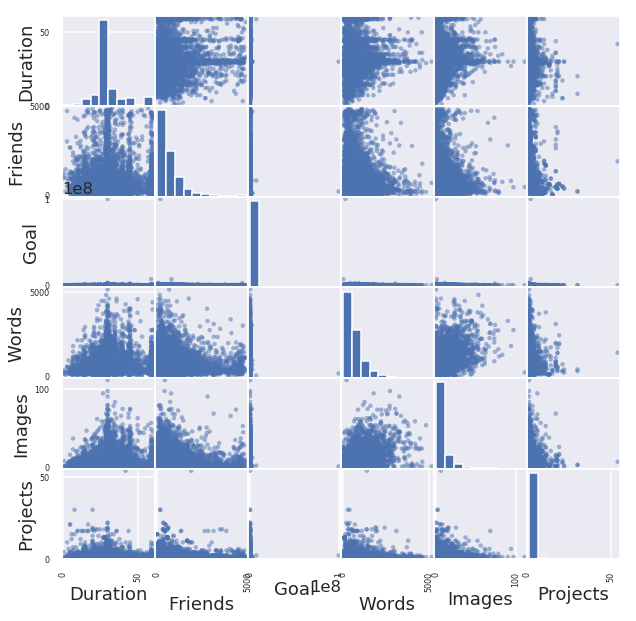

In [13]:
# Plotting out the correlation matrix of the variables we are comparing
f1 = pd.plotting.scatter_matrix(data[['Duration', 'Friends', 'Goal' , \
                    'Words', 'Images', 'Projects']], figsize=[10,10])

This is a matrix of correlations between all of the characteristics we chose to analyze. Notice that the “Goal” column and rows correlation behaviors seems weird, where it is close to either a vertical or horizontal line. We will examine these more closely with a smaller axis to see the actual correlation without any outliers affecting the indexing on the graphs.

Text(0.5, 1.0, 'Number of projects that failed and succeeded')

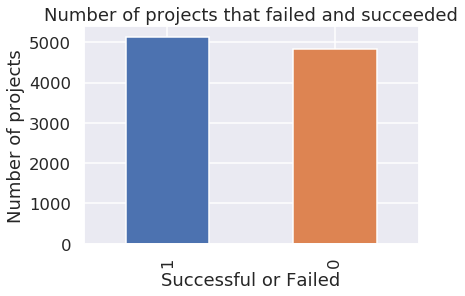

In [14]:
# Plotting total number of successes and failures in dataset
f2 = data['State'].value_counts().plot('bar')
plt.xlabel("Successful or Failed")
plt.ylabel("Number of projects")
plt.title("Number of projects that failed and succeeded")

This bar graph shows the number of “Successful” and “Failed” Kickstarter projects and their label as either a “1” or a “0”.
Next we printed the correlation between “Words” and “Images”, “Goal” and “Words”, and “Words” and “State”. 

Text(0.5, 1.0, 'Correlation of Words and Images')

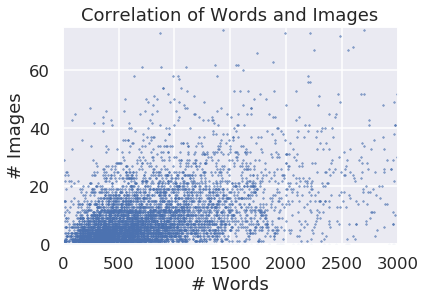

In [16]:
# Expanding plot that looked most correlated, Words and Images
plt.scatter(data['Words'], data['Images'], s=.4)
plt.xlabel('# Words')
plt.ylabel('# Images')
plt.xlim(0, 3000)
plt.ylim(0,75)
plt.title('Correlation of Words and Images')

We plotted “Words” against “Images” because in our scatterplot above, all the goal columns and rows seem to be uncorrelated, where most of the data seemingly represents a horizontal line. Upon looking more closely at this graph and setting the axis to smaller maximum values, we can see that “Words” and “Images” are actually correlated. When examined more closely, the correlation does appear to be low between words and images, meaning both will most likely be needed to capture the data, instead of being able to leave one or the other out with minimal effects.

Text(0.5, 1.0, 'Correlation of Goal and Words')

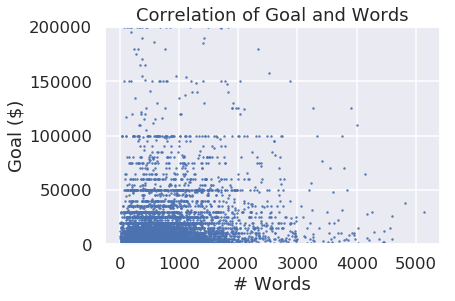

In [17]:
# Looking at one of the goal plots which appear the strangest
plt.scatter(data['Words'], data['Goal'], s=.8)
plt.xlabel('# Words')
plt.ylabel('Goal ($)')
plt.ylim(0, 200000)
plt.title('Correlation of Goal and Words')

We plotted “Goal” against “Words” because this looked the most strange. The goal plot also appears to look strange with all the values appearing to be stuck at 0 for all the plots, but this is actually due to the fact that there were a few very high asking amounts for the goal so autofitting the plot to include all points makes the scaling look weird, but when a more appropriate scaling that captures most of the data is used, the plot becomes more similar to the others.

Text(0, 0.5, 'Whether Succeeded')

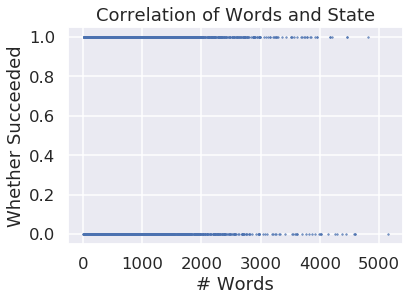

In [18]:
# Plotting State vs Words
plt.scatter(data['Words'], data['State'], s=.5)
plt.title('Correlation of Words and State')
plt.xlabel('# Words')
plt.ylabel('Whether Succeeded')

We plotted “Words” against “State” to see if we can predict “State” using just the category “Words”. As can be seen, there is not a strong correlation between Words and State, meaning there is not a simple way to predict State using just the number of words. This means we need a more complex model to take into account the different attributes we have in order to predict whether or not a startup will be funded.

In [19]:
# Getting array of each of attributes of data
State_Data = data['State'].values
Goal_Data = data['Goal'].values
Duration_Data = data['Duration'].values
Friends_Data = data['Friends'].values
Projects_Data = data['Projects'].values
Images_Data = data['Images'].values
Words_Data = data['Words'].values

# Creating dictionary to hold accuracy values
accuracy_rf = {}

The project analyzed the factors for failure and success of kickstarter. We used a data set of 9978 projects and 6 features to differentiate successful and failed projects. When we started, the data set had more than 20 categories or columns, but for simplicity in our project, we are only measuring six of the attributes to predict the failure and success of the projects, dropping all the other extra columns. Also, we make sure our data contained the same currency which is USD. We started with the data set contained more successful projects which is about 5200 projects compared with failed projects, about 4900 projects. The prediction is based on the 6 features we have Goal, Duration, Friends, projects, images, and words. As we can see on our “Accuracy for each leave one out Analysis” histogram, we explored the importance of each attribute by leaving out each attribute to see which one is most important. To do this we first train with 0.75 of data and use 0.25 to test by leaving out each attribute and comparing it with actual data to see which one is the most important and least important predictor.

# Working with all attributes

In [20]:
##############################
#  Getting the training set  #
##############################

# Getting the X or predictor variable set
Train_X = Goal_Data[0:int(len(Goal_Data) * .75)]
Train_X = np.expand_dims(Train_X, axis=1)
Train_X = np.append(Train_X, np.expand_dims(Friends_Data[0:int(len(Friends_Data) \
                                            * .75)], axis=1), axis=1)
Train_X = np.append(Train_X, np.expand_dims(Duration_Data[0:int(len(Duration_Data) \
                                            * .75)], axis=1), axis=1)
Train_X = np.append(Train_X, np.expand_dims(Projects_Data[0:int(len(Projects_Data) \
                                            * .75)], axis=1), axis=1)
Train_X = np.append(Train_X, np.expand_dims(Images_Data[0:int(len(Images_Data) \
                                            * .75)], axis=1), axis=1)
Train_X = np.append(Train_X, np.expand_dims(Words_Data[0:int(len(Words_Data) \
                                            * .75)], axis=1), axis=1)

# Getting the Y or prediction variable set
Train_Y = State_Data[0:int(len(State_Data) * .75)]

#############################
#  Getting the testing set  #
#############################

# Getting the X or predictor variable set
Test_X = Goal_Data[int(len(Goal_Data) * .75):]
Test_X = np.expand_dims(Test_X, axis=1)
Test_X = np.append(Test_X, np.expand_dims(Friends_Data[int(len(Friends_Data) \
                                                * .75):], axis=1), axis=1)
Test_X = np.append(Test_X, np.expand_dims(Duration_Data[int(len(Duration_Data) \
                                                * .75):], axis=1), axis=1)
Test_X = np.append(Test_X, np.expand_dims(Projects_Data[int(len(Projects_Data) \
                                                * .75):], axis=1), axis=1)
Test_X = np.append(Test_X, np.expand_dims(Images_Data[int(len(Images_Data) \
                                                * .75):], axis=1), axis=1)
Test_X = np.append(Test_X, np.expand_dims(Words_Data[int(len(Words_Data) \
                                                * .75):], axis=1), axis=1)

# Getting the Y or prediction variable set
Test_Y = State_Data[int(len(State_Data) * .75):]


#################
# Random Forest #
#################

clf = RandomForestRegressor(random_state=0)
clf.fit(Train_X, Train_Y)

# Predicting using the random forest
predictions = clf.predict(Test_X)

predictions = predictions >= 0.5
Test_Y = (Test_Y == 1)

# Checking correct or not
correct = (predictions == Test_Y)

# Getting and printing accuracy on valid set
Accuracy = sum(correct) / len(Test_Y)
accuracy_rf['All'] = Accuracy*100

# Leaving out Goal

In [21]:
##############################
#  Getting the training set  #
##############################

# Getting the X or predictor variable set
Train_X = Friends_Data[0:int(len(Friends_Data) * .75)]
Train_X = np.expand_dims(Train_X, axis=1)
Train_X = np.append(Train_X, np.expand_dims(Duration_Data[0:int(len(Duration_Data) \
                                                    * .75)], axis=1), axis=1)
Train_X = np.append(Train_X, np.expand_dims(Projects_Data[0:int(len(Projects_Data) \
                                                    * .75)], axis=1), axis=1)
Train_X = np.append(Train_X, np.expand_dims(Images_Data[0:int(len(Images_Data) \
                                                    * .75)], axis=1), axis=1)
Train_X = np.append(Train_X, np.expand_dims(Words_Data[0:int(len(Words_Data) \
                                                    * .75)], axis=1), axis=1)

# Getting the Y or prediction variable set
Train_Y = State_Data[0:int(len(State_Data) * .75)]

#############################
#  Getting the testing set  #
#############################

# Getting the X or predictor variable set
Test_X = Friends_Data[int(len(Friends_Data) * .75):]
Test_X = np.expand_dims(Test_X, axis=1)
Test_X = np.append(Test_X, np.expand_dims(Duration_Data[int(len(Duration_Data) \
                                                * .75):], axis=1), axis=1)
Test_X = np.append(Test_X, np.expand_dims(Projects_Data[int(len(Projects_Data) \
                                                * .75):], axis=1), axis=1)
Test_X = np.append(Test_X, np.expand_dims(Images_Data[int(len(Images_Data) \
                                                * .75):], axis=1), axis=1)
Test_X = np.append(Test_X, np.expand_dims(Words_Data[int(len(Words_Data) \
                                                * .75):], axis=1), axis=1)

# Getting the Y or prediction variable set
Test_Y = State_Data[int(len(State_Data) * .75):]


#################
# Random Forest #
#################

clf = RandomForestRegressor(random_state=0)
clf.fit(Train_X, Train_Y)

# Predicting using the random forest
predictions = clf.predict(Test_X)

predictions = predictions >= 0.5
Test_Y = (Test_Y == 1)

# Checking correct or not
correct = (predictions == Test_Y)

# Getting and printing accuracy on valid set
Accuracy = sum(correct) / len(Test_Y)
accuracy_rf['W/O Goal'] = Accuracy*100

# Leaving out duration

In [22]:
##############################
#  Getting the training set  #
##############################

# Getting the X or predictor variable set
Train_X = Goal_Data[0:int(len(Goal_Data) * .75)]
Train_X = np.expand_dims(Train_X, axis=1)
Train_X = np.append(Train_X, np.expand_dims(Friends_Data[0:int(len(Friends_Data) \
                                                    * .75)], axis=1), axis=1)
Train_X = np.append(Train_X, np.expand_dims(Projects_Data[0:int(len(Projects_Data) \
                                                    * .75)], axis=1), axis=1)
Train_X = np.append(Train_X, np.expand_dims(Images_Data[0:int(len(Images_Data) \
                                                    * .75)], axis=1), axis=1)
Train_X = np.append(Train_X, np.expand_dims(Words_Data[0:int(len(Words_Data) \
                                                    * .75)], axis=1), axis=1)

# Getting the Y or prediction variable set
Train_Y = State_Data[0:int(len(State_Data) * .75)]

#############################
#  Getting the testing set  #
#############################

# Getting the X or predictor variable set
Test_X = Goal_Data[int(len(Goal_Data) * .75):]
Test_X = np.expand_dims(Test_X, axis=1)
Test_X = np.append(Test_X, np.expand_dims(Friends_Data[int(len(Friends_Data) \
                                                    * .75):], axis=1), axis=1)
Test_X = np.append(Test_X, np.expand_dims(Projects_Data[int(len(Projects_Data) \
                                                    * .75):], axis=1), axis=1)
Test_X = np.append(Test_X, np.expand_dims(Images_Data[int(len(Images_Data) \
                                                    * .75):], axis=1), axis=1)
Test_X = np.append(Test_X, np.expand_dims(Words_Data[int(len(Words_Data) \
                                                    * .75):], axis=1), axis=1)

# Getting the Y or prediction variable set
Test_Y = State_Data[int(len(State_Data) * .75):]

#################
# Random Forest #
#################

clf = RandomForestRegressor(random_state=0)
clf.fit(Train_X, Train_Y)

# Predicting using the random forest
predictions = clf.predict(Test_X)

predictions = predictions >= 0.5
Test_Y = (Test_Y == 1)

# Checking correct or not
correct = (predictions == Test_Y)

# Getting and printing accuracy on valid set
Accuracy = sum(correct) / len(Test_Y)
accuracy_rf['W/O Duration'] = Accuracy*100

# Leaving out friends

In [23]:
##############################
#  Getting the training set  #
##############################

# Getting the X or predictor variable set
Train_X = Goal_Data[0:int(len(Goal_Data) * .75)]
Train_X = np.expand_dims(Train_X, axis=1)
Train_X = np.append(Train_X, np.expand_dims(Duration_Data[0:int(len(Duration_Data) \
                                                    * .75)], axis=1), axis=1)
Train_X = np.append(Train_X, np.expand_dims(Projects_Data[0:int(len(Projects_Data) \
                                                    * .75)], axis=1), axis=1)
Train_X = np.append(Train_X, np.expand_dims(Images_Data[0:int(len(Images_Data) \
                                                    * .75)], axis=1), axis=1)
Train_X = np.append(Train_X, np.expand_dims(Words_Data[0:int(len(Words_Data) \
                                                    * .75)], axis=1), axis=1)

# Getting the Y or prediction variable set
Train_Y = State_Data[0:int(len(State_Data) * .75)]

#############################
#  Getting the testing set  #
#############################

# Getting the X or predictor variable set
Test_X = Goal_Data[int(len(Goal_Data) * .75):]
Test_X = np.expand_dims(Test_X, axis=1)
Test_X = np.append(Test_X, np.expand_dims(Duration_Data[int(len(Duration_Data) \
                                                    * .75):], axis=1), axis=1)
Test_X = np.append(Test_X, np.expand_dims(Projects_Data[int(len(Projects_Data) \
                                                    * .75):], axis=1), axis=1)
Test_X = np.append(Test_X, np.expand_dims(Images_Data[int(len(Images_Data) \
                                                    * .75):], axis=1), axis=1)
Test_X = np.append(Test_X, np.expand_dims(Words_Data[int(len(Words_Data) \
                                                    * .75):], axis=1), axis=1)

# Getting the Y or prediction variable set
Test_Y = State_Data[int(len(State_Data) * .75):]

#################
# Random Forest #
#################

clf = RandomForestRegressor(random_state=0)
clf.fit(Train_X, Train_Y)

# Predicting using the random forest
predictions = clf.predict(Test_X)

predictions = predictions >= 0.5
Test_Y = (Test_Y == 1)

# Checking correct or not
correct = (predictions == Test_Y)

# Getting and printing accuracy on valid set
Accuracy = sum(correct) / len(Test_Y)
accuracy_rf['W/O Friends'] = Accuracy*100

# Leaving out projects

In [24]:
##############################
#  Getting the training set  #
##############################

# Getting the X or predictor variable set
Train_X = Goal_Data[0:int(len(Goal_Data) * .75)]
Train_X = np.expand_dims(Train_X, axis=1)
Train_X = np.append(Train_X, np.expand_dims(Duration_Data[0:int(len(Duration_Data) \
                                                    * .75)], axis=1), axis=1)
Train_X = np.append(Train_X, np.expand_dims(Friends_Data[0:int(len(Friends_Data) \
                                                    * .75)], axis=1), axis=1)
Train_X = np.append(Train_X, np.expand_dims(Images_Data[0:int(len(Images_Data) \
                                                    * .75)], axis=1), axis=1)
Train_X = np.append(Train_X, np.expand_dims(Words_Data[0:int(len(Words_Data) \
                                                    * .75)], axis=1), axis=1)

# Getting the Y or prediction variable set
Train_Y = State_Data[0:int(len(State_Data) * .75)]

#############################
#  Getting the testing set  #
#############################

# Getting the X or predictor variable set
Test_X = Goal_Data[int(len(Goal_Data) * .75):]
Test_X = np.expand_dims(Test_X, axis=1)
Test_X = np.append(Test_X, np.expand_dims(Duration_Data[int(len(Duration_Data) \
                                                    * .75):], axis=1), axis=1)
Test_X = np.append(Test_X, np.expand_dims(Friends_Data[int(len(Friends_Data) \
                                                    * .75):], axis=1), axis=1)
Test_X = np.append(Test_X, np.expand_dims(Images_Data[int(len(Images_Data) \
                                                    * .75):], axis=1), axis=1)
Test_X = np.append(Test_X, np.expand_dims(Words_Data[int(len(Words_Data) \
                                                    * .75):], axis=1), axis=1)

# Getting the Y or prediction variable set
Test_Y = State_Data[int(len(State_Data) * .75):]

#################
# Random Forest #
#################

clf = RandomForestRegressor(random_state=0)
clf.fit(Train_X, Train_Y)

# Predicting using the random forest
predictions = clf.predict(Test_X)

predictions = predictions >= 0.5
Test_Y = (Test_Y == 1)

# Checking correct or not
correct = (predictions == Test_Y)

# Getting and printing accuracy on valid set
Accuracy = sum(correct) / len(Test_Y)
accuracy_rf['W/O Projects'] = Accuracy*100

# Leaving out images

In [25]:
##############################
#  Getting the training set  #
##############################

# Getting the X or predictor variable set
Train_X = Goal_Data[0:int(len(Goal_Data) * .75)]
Train_X = np.expand_dims(Train_X, axis=1)
Train_X = np.append(Train_X, np.expand_dims(Duration_Data[0:int(len(Duration_Data) \
                                                    * .75)], axis=1), axis=1)
Train_X = np.append(Train_X, np.expand_dims(Friends_Data[0:int(len(Friends_Data) \
                                                    * .75)], axis=1), axis=1)
Train_X = np.append(Train_X, np.expand_dims(Projects_Data[0:int(len(Projects_Data) \
                                                    * .75)], axis=1), axis=1)
Train_X = np.append(Train_X, np.expand_dims(Words_Data[0:int(len(Words_Data) \
                                                    * .75)], axis=1), axis=1)

# Getting the Y or prediction variable set
Train_Y = State_Data[0:int(len(State_Data) * .75)]

#############################
#  Getting the testing set  #
#############################

# Getting the X or predictor variable set
Test_X = Goal_Data[int(len(Goal_Data) * .75):]
Test_X = np.expand_dims(Test_X, axis=1)
Test_X = np.append(Test_X, np.expand_dims(Duration_Data[int(len(Duration_Data) \
                                                    * .75):], axis=1), axis=1)
Test_X = np.append(Test_X, np.expand_dims(Friends_Data[int(len(Friends_Data) \
                                                    * .75):], axis=1), axis=1)
Test_X = np.append(Test_X, np.expand_dims(Projects_Data[int(len(Projects_Data) \
                                                    * .75):], axis=1), axis=1)
Test_X = np.append(Test_X, np.expand_dims(Words_Data[int(len(Words_Data) \
                                                    * .75):], axis=1), axis=1)

# Getting the Y or prediction variable set
Test_Y = State_Data[int(len(State_Data) * .75):]

#################
# Random Forest #
#################

clf = RandomForestRegressor(random_state=0)
clf.fit(Train_X, Train_Y)

# Predicting using the random forest
predictions = clf.predict(Test_X)

predictions = predictions >= 0.5
Test_Y = (Test_Y == 1)

# Checking correct or not
correct = (predictions == Test_Y)

# Getting and printing accuracy on valid set
Accuracy = sum(correct) / len(Test_Y)
accuracy_rf['W/O Images'] = Accuracy*100

# Leaving out words

In [26]:
##############################
#  Getting the training set  #
##############################

# Getting the X or predictor variable set
Train_X = Goal_Data[0:int(len(Goal_Data) * .75)]
Train_X = np.expand_dims(Train_X, axis=1)
Train_X = np.append(Train_X, np.expand_dims(Duration_Data[0:int(len(Duration_Data) \
                                                    * .75)], axis=1), axis=1)
Train_X = np.append(Train_X, np.expand_dims(Friends_Data[0:int(len(Friends_Data) \
                                                    * .75)], axis=1), axis=1)
Train_X = np.append(Train_X, np.expand_dims(Projects_Data[0:int(len(Projects_Data) \
                                                    * .75)], axis=1), axis=1)
Train_X = np.append(Train_X, np.expand_dims(Images_Data[0:int(len(Images_Data) \
                                                    * .75)], axis=1), axis=1)

# Getting the Y or prediction variable set
Train_Y = State_Data[0:int(len(State_Data) * .75)]

#############################
#  Getting the testing set  #
#############################

# Getting the X or predictor variable set
Test_X = Goal_Data[int(len(Goal_Data) * .75):]
Test_X = np.expand_dims(Test_X, axis=1)
Test_X = np.append(Test_X, np.expand_dims(Duration_Data[int(len(Duration_Data) \
                                                    * .75):], axis=1), axis=1)
Test_X = np.append(Test_X, np.expand_dims(Friends_Data[int(len(Friends_Data) \
                                                    * .75):], axis=1), axis=1)
Test_X = np.append(Test_X, np.expand_dims(Projects_Data[int(len(Projects_Data) \
                                                    * .75):], axis=1), axis=1)
Test_X = np.append(Test_X, np.expand_dims(Images_Data[int(len(Images_Data) \
                                                    * .75):], axis=1), axis=1)

# Getting the Y or prediction variable set
Test_Y = State_Data[int(len(State_Data) * .75):]

#################
# Random Forest #
#################

clf = RandomForestRegressor(random_state=0)
clf.fit(Train_X, Train_Y)

# Predicting using the random forest
predictions = clf.predict(Test_X)

predictions = predictions >= 0.5
Test_Y = (Test_Y == 1)

# Checking correct or not
correct = (predictions == Test_Y)

# Getting and printing accuracy on valid set
Accuracy = sum(correct) / len(Test_Y)
accuracy_rf['W/O Words'] = Accuracy*100
              

In [27]:
# Printing out the accuracies for rf
accuracy_rf

{'All': 65.93186372745491,
 'W/O Duration': 66.733466933867732,
 'W/O Friends': 61.643286573146291,
 'W/O Goal': 59.839679358717433,
 'W/O Images': 65.290581162324642,
 'W/O Projects': 65.250501002004015,
 'W/O Words': 63.366733466933866}

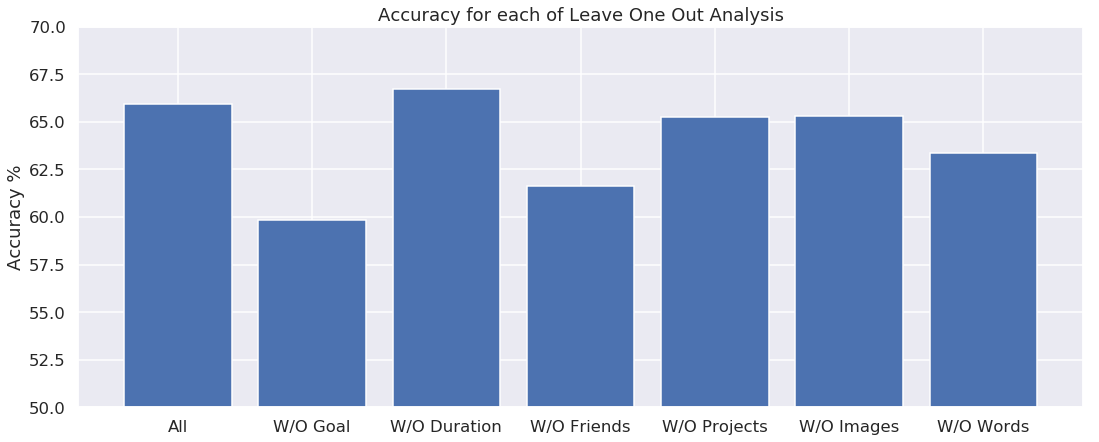

In [28]:
# Plotting out the accuracies
f, ax = plt.subplots(figsize=(18,7))
plt.bar(*zip(*accuracy_rf.items()))
plt.ylabel('Accuracy %')
plt.title('Accuracy for each of Leave One Out Analysis')
plt.ylim(50,70)
plt.show()

This is the final result of our analysis that shows us the accuracy of our model after training it with our train data. We tested our models with the test data and compared it with the actual result of whether or not a kickstarter was successful. As we can see, without the “Goal” column, the accuracy of predicting whether a kickstarter is successful or not decrease, so we can conclude that “Goal” is most correlated to predicting a kickstarter’s success.

# Most important attribute: Goal

After running multiple models, each leaving out an attribute to measure the different accuracies of each model, our results can be found on the bar graph. The most important attribute: “Goal”, which is the column representing the amount of the kickstarter’s initial monetary goal. Looking at the results we can see that “Goal” is the most important factor of the attributes we examined for determining whether or not a kickstarter will be funded since the accuracy went down the furthest when this attribute was removed from training.

# Least important attribute: Duration

Looking at the results we can also see that “Duration” is the least important factor of the attributes we examined for determining whether or not a kickstarter will be funded since the accuracy actually improved when this attribute was removed from training. This means that duration did not help improve the training and even caused problems that slightly threw off the training, leading to worse predictions.

# Ethics & Privacy

We are using data on Kaggle. This data is publically available and anyone can access it. When looking at our dataset, there are some privacy concerns because Kickstarters can contain personal information provided by the creators of them for the purpose of telling a more complete story that would generate more shares and support in donations. However, this is a concern that can be dismissed because all information that is provided on Kickstarters was knowingly provided and also published onto the public Internet to be viewed and shared. Our dataset, however, is not biased. This is because it was collected by an individual that has no apparent affiliation or involvement with the company Kickstarter or any of the Kickstarters listed in the dataset. We checked this by viewing the public Kaggle profile of the user that created and posted this dataset. Upon viewing the user’s public profile, we found that the user does not not have any biography or datasets under “favorites”. The user only has one public dataset that was posted one year ago, which is the dataset we are using for this project. Additionally, in looking at the “Categories” column of the dataset, we found that there are 146 unique categories, or topics of Kickstarters that the dataset contains. This shows that the dataset is not biased towards one or a few specific topics, instead, it contains data on Kickstarters across a variety of topics. One thing we have considered is that our data can be used for ill. It is possible that someone could use our dataset to slander efforts that have not been successful. For example, if someone disliked certain films, he/she could look through our dataset and find Kickstarters that were unsuccessful in reaching their “Goal” and slander their lack of support. However, we do not foresee anyone doing this because it would not benefit them in any way. Now, we will discuss how there could be unintended consequences from our findings. Someone who reads our projectand is interested in creating a Kickstarter could miscontrue our findings and try to choose a “Goal” that is unachievable or out of scope of the actual cause the Kickstarter was created for.
Someone could profit from our findings if they followed our conclusion and created Kickstarter(s) that focused on the “Goal”. We can guard against this by putting a disclaimer that our result will not necessarily result in profit. We can also guard against someone profiting from our findings by keeping our project private and unshared with the public. There are most certainly things to consider when choosing and analyzing our dataset. Ultimately, however, there was little to none significant disturbance or harm caused by our usage of our chosen dataset to those that were contained in the dataset.

# Conclusion & Discussion

Our hypothesis was that the most important characteristic in a Kickstarter’s success is “Friends”. In other words, we thought that if we took away “Friends” from a Kickstarter, it would lose more support compared to taking away any of the other characteristics: “Goal”, “Duration”, “Projects”, “Images”, or “Words”. Our data analysis, however, proved otherwise. To answer our research question, “Out of the six variables: ‘Goal’, ‘Duration’, ‘Friends’, ‘Projects’, ‘Images’, and ‘Words’, which variable contributes most to a Kickstarter’s success?”, the most important characteristic is “Goal”. We came to this conclusion because of what our final graphs show after running multiple simulation models, leaving out a certain attribute. The final graphs show that the least accurate model, at roughly 60%, comes when the characteristic “Goal” is left out. On the other hand, “Duration” was a variable that should have been left out since our graph indicated that without it as an attribute, our accuracy of predicting a kickstarter’s success actually increased! Our model may have relied on “Duration” as a predictor too much, which led to these results, which shows that our analysis is limited in that we did not include all 35 columns of variables that were present in the dataset. If we were to do this data analysis again, we could include more or even all of the columns in the dataset to produce a more complete analysis of what characteristic makes Kickstarters the most successful. It would also be interesting if we compared the effectiveness of Kickstarters in comparison to other crowdfunding websites mentioned earlier like GoFundme and Crowd Supply.

# Works Cited

1.) Falcon, Alvaris. “10 Crowdfunding Sites To Fuel Your Dream Project.” Hongkiat, 27 May 2019, https://hongkiat.com/blog/crowdfunding-sites/.

2.) Crockett, Zachary. “Kickstarter: A Data Analysis.” The Hustle, 10 Feb. 2019, https://thehustle.co/archive/02102019d/.

3.) Lamidi, Adebola, and Adebola Lamidi. “Predicting the Success of Kickstarter Campaigns.” Towards Data Science, Towards Data Science, 20 Sept. 2017, https://towardsdatascience.com/predicting-the-success-of-kickstarter-campaigns-3f4a976419b9.